# Кластеризация голосов жителей Москвы по правилам землепользования и застройки (ПЗЗ)

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Задачи

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Доп. задачи
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

In [3]:
my_sheet = 'Sheet1'
file_name = 'geo.xlsx' 
df = pd.read_excel(file_name, sheet_name = my_sheet)
df = df.drop(df.iloc[:,:1],axis=1)

In [4]:
X = np.array(df.iloc[:,:2])
X

array([[37.612416, 55.777454],
       [37.612416, 55.777454],
       [37.603298, 55.742108],
       ...,
       [37.421066, 55.848756],
       [37.448509, 55.793065],
       [37.451249, 55.83662 ]])

In [5]:
y = df.comment_class
y

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
108801   -1
108802   -1
108803    1
108804   -1
108805   -1
Name: comment_class, Length: 108806, dtype: int64

In [6]:
df.comment_class.unique()

array([-1,  1], dtype=int64)

In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

###### Расспределение голосов

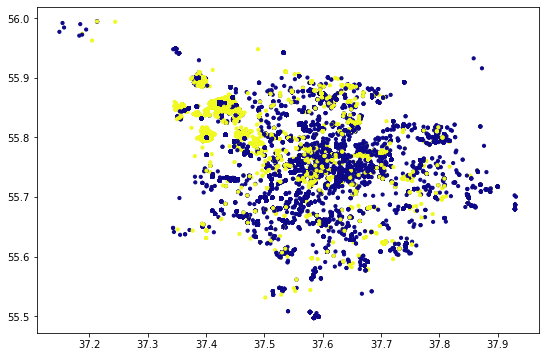

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma', s=10)

#### Кластеризация с помощью метода DBSCAN

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

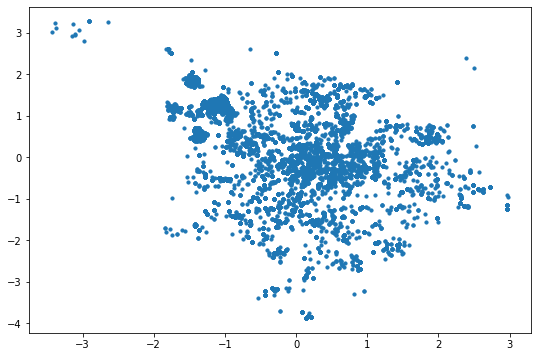

In [10]:
X_scaled = scaler.fit_transform(X)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', s=10)

pred_DBSCAN = clf.fit_predict(X_scaled)

adjusted_rand_score(y, pred_DBSCAN)

In [11]:
score = []
ks = np.arange(0.1, 0.15, 0.01)
for k in tqdm(ks):
    clf = DBSCAN(eps=k,n_jobs=-1)
    clusters_DBSCAN = clf.fit_predict(X_scaled, )
    score.append(adjusted_rand_score(y, clusters_DBSCAN))
    print(k,adjusted_rand_score(y, clusters_DBSCAN))

 20%|████████▊                                   | 1/5 [00:22<01:30, 22.58s/it]

0.1 0.027095035777767687


 40%|█████████████████▌                          | 2/5 [00:48<01:11, 23.68s/it]

0.11 0.03337272014906817


 60%|██████████████████████████▍                 | 3/5 [01:17<00:50, 25.13s/it]

0.12 0.0844711026214381


 80%|███████████████████████████████████▏        | 4/5 [01:45<00:26, 26.08s/it]

0.13 0.15402200371085908


100%|████████████████████████████████████████████| 5/5 [02:20<00:00, 28.15s/it]

0.13999999999999999 0.21087781563408256


In [12]:
score

[0.027095035777767687,
 0.03337272014906817,
 0.0844711026214381,
 0.15402200371085908,
 0.21087781563408256]

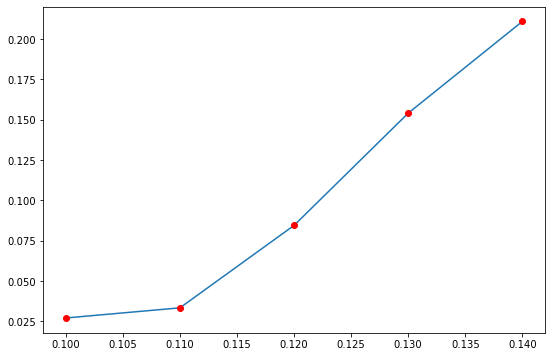

In [13]:
plt.plot(ks, score)
plt.plot(ks, score, 'ro')

In [14]:
diff = np.diff(score)

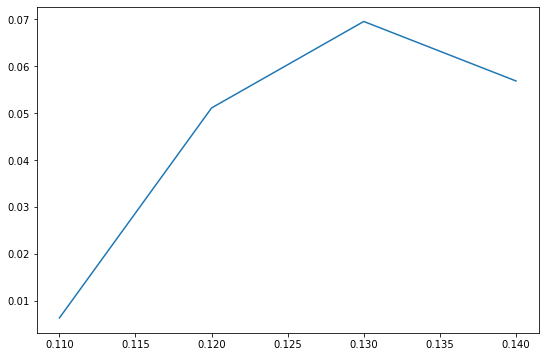

In [15]:
plt.plot(ks[1:], diff)

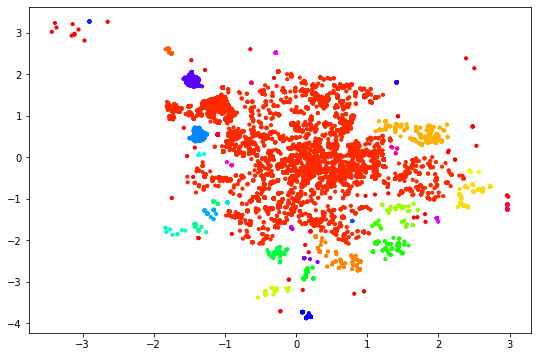

In [17]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_DBSCAN, cmap='hsv', s=10)

#### Кластеризация с помощью метода KMeans

In [18]:
clf_kmeans = KMeans(n_clusters=35)

In [19]:
pred_KMeans = clf_kmeans.fit_predict(X_scaled)

In [20]:
adjusted_rand_score(y, pred_KMeans)

0.00997720567060668

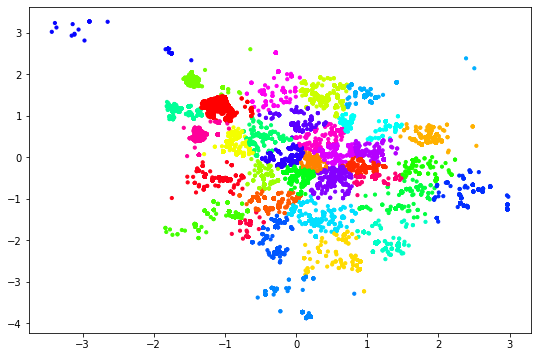

In [21]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=pred_KMeans, cmap='hsv', s=10)

###### Представление расспределения голосов "за" и "против" на разных рисунках

In [22]:
df_Possitive = df[df.comment_class == 1]
df_Negative = df[df.comment_class == -1]

In [23]:
X_Possitive = np.array(df_Possitive.iloc[:,:2])
y_Possitive = df_Possitive.comment_class

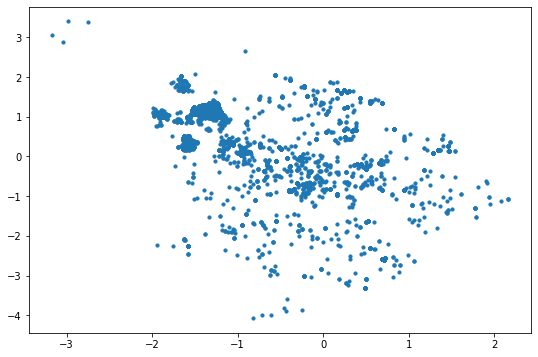

In [24]:
X_Possitive_scaled = scaler.fit_transform(X_Possitive)
plt.scatter(X_Possitive_scaled[:, 0], X_Possitive_scaled[:, 1], cmap='autumn', s=10)

In [25]:
X_Negative = np.array(df_Negative.iloc[:,:2])
y_Negative = df_Negative.comment_class

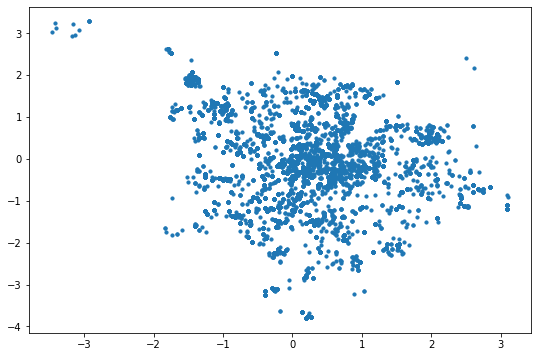

In [26]:
X_Negative_scaled = scaler.fit_transform(X_Negative)
plt.scatter(X_Negative_scaled[:, 0], X_Negative_scaled[:, 1], cmap='autumn', s=10)

#### Определение оптимального числа кластеров для метода KMeans

In [27]:
score = [] 
ks = range(1,41)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    #k_inertia.append(clf_kmeans.inertia_)
    score.append(adjusted_rand_score(y, clusters_kmeans))
    print(k,adjusted_rand_score(y, clusters_kmeans))

1 0.0
2 -0.00253155933033669
3 0.004152698051781843
4 -0.006001096953696717
5 0.021485373065537897
6 0.019681583611811822
7 0.01963905274698731
8 0.015258248982744433
9 0.017918932383332947
10 0.017261033130579948
11 0.007521069249531207
12 0.015245906411185556
13 0.009186306990573255
14 0.01862667340792205
15 0.02086662546207985
16 0.019073872345365443
17 0.01712899455942927
18 0.02211897256388005
19 0.016552387479747688
20 0.01972422707590732
21 0.018789421547990823
22 0.01766052393123108
23 0.014834638185712519
24 0.017356345937352195
25 0.012698053812536629
26 0.017132888628715797
27 0.011815424363401137
28 0.014173547296994608
29 0.012590622204268738
30 0.01196592150446608
31 0.0091217680850102
32 0.011695324790536048
33 0.010131863580558453
34 0.009602897137085053
35 0.010168283837748577
36 0.009223879884872005
37 0.009963141600925934
38 0.010405625972225016
39 0.009995927970123327
40 0.009689674367180956


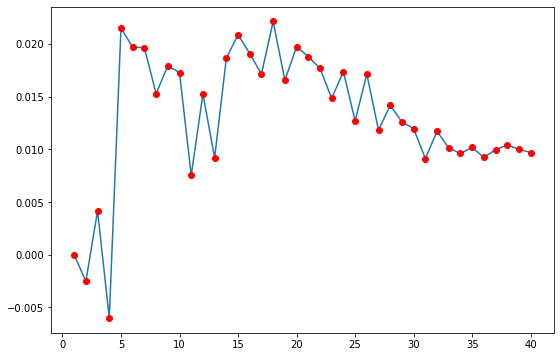

In [29]:
plt.plot(ks, score)
plt.plot(ks, score, 'ro')

In [30]:
#plt.plot(ks, k_inertia)
#plt.plot(ks, k_inertia, 'ro')

In [33]:
diff = np.diff(score)

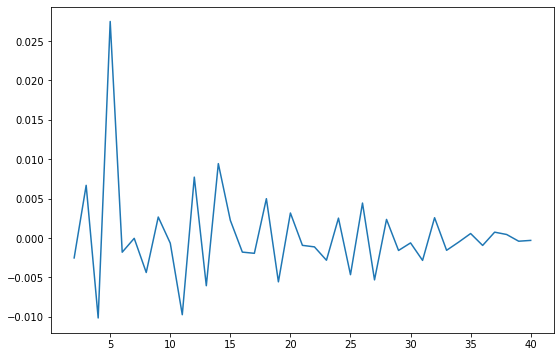

In [34]:
plt.plot(ks[1:], diff)

In [35]:
diff_r = diff[1:] / diff[:-1]

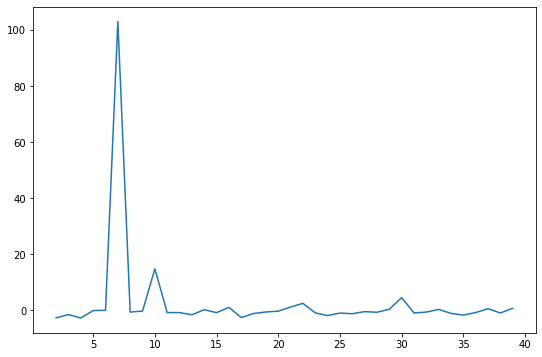

In [36]:
plt.plot(ks[1:-1], diff_r)

In [37]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

4

In [38]:
ks

range(1, 41)

###### Оптимальное число кластеров = 5

#### Выделение сновных тематик комментариев жителей (не закончен)

In [39]:
my_sheet = 'Sheet1'
file_name = 'geo_comment.xlsx' 
df2 = pd.read_excel(file_name, sheet_name = my_sheet)
df2 = df2.drop(df2.iloc[:,:1],axis=1)

In [40]:
df2

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...
...,...,...,...,...,...
70377,37.454528,55.792331,-1,1,Не поддерживаю. Я против строительства многоэт...
70378,37.384325,55.899068,-1,1,Не поддерживаю. Не нужны отстойники автобусов ...
70379,37.421066,55.848756,1,1,"Не поддерживаю. На мой взгляд, необходимо искл..."
70380,37.448509,55.793065,-1,1,Не поддерживаю: нарушения при строительстве н...


In [41]:
df2.multiplier.unique()

array([   1,    5,    4,   17,  196,   49,   54,   14,    3,    6,   15,
         12,   11,   53,   55,   47,   21,  109,   22,   23,   42,    8,
         28,   29,    2,  229,   35,   43,   26,   30,   32,   18,   10,
         62,  341,    7,   68,   67,   19,   16,  392,  147,  135, 1273,
        425,   27,   57,    9,  149,   13,   60,   96,  409,   66,   20,
        519,   95,  116,   52,   45,  125,   81,   44,   50,  915,  119,
        193,  302, 1182,  131,  198,  260,   24,  220,   58, 1500],
      dtype=int64)

In [42]:
df2.comment

0        Во все разделы правил землепользования и застр...
1        На основании вступившего в законную силу судеб...
2        Внести в Проект правил землепользования и заст...
3        Учитывая социальную значимость проекта строите...
4        Учитывая социальную значимость проекта строите...
                               ...                        
70377    Не поддерживаю. Я против строительства многоэт...
70378    Не поддерживаю. Не нужны отстойники автобусов ...
70379    Не поддерживаю. На мой взгляд, необходимо искл...
70380    Не поддерживаю: нарушения при  строительстве н...
70381    Не поддерживаю. Выступаю против застройки бере...
Name: comment, Length: 70382, dtype: object

In [43]:
from collections import Counter

In [44]:
words = [w for w in " ".join(df2.comment).split() if len(w)>2]

In [45]:
Counter(words).most_common()[:60]

[('застройки', 261867),
 ('Москвы', 221020),
 ('для', 219973),
 ('города', 213913),
 ('ПЗЗ', 174813),
 ('землепользования', 166206),
 ('использования', 153538),
 ('объектов', 152935),
 ('территории', 144173),
 ('разрешенного', 129902),
 ('что', 122991),
 ('Правил', 122062),
 ('земельных', 120453),
 ('проект', 117499),
 ('публичных', 116622),
 ('слушаний', 98734),
 ('зоны', 98544),
 ('строительства', 93008),
 ('также', 89461),
 ('как', 89415),
 ('соответствии', 84669),
 ('строительство', 84629),
 ('ул.', 80564),
 ('проекта', 79876),
 ('участков', 78747),
 ('участка', 77416),
 ('зон', 75494),
 ('слушания', 73367),
 ('под', 72740),
 ('кодекса', 71483),
 ('капитального', 71242),
 ('Москвы,', 70905),
 ('ст.', 67971),
 ('против', 67195),
 ('Градостроительного', 66600),
 ('земельного', 66258),
 ('быть', 65089),
 ('публичные', 63647),
 ('Москве', 63082),
 ('виды', 61240),
 ('культурного', 61059),
 ('ГПЗУ', 57611),
 ('комплекса', 56839),
 ('территориальных', 55879),
 ('участке', 55201),
 ('боле

In [61]:
from wordcloud import WordCloud

def get_wordcloud(text,max_font_size=None):
    wordcloud = WordCloud(max_font_size=max_font_size).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")

In [ ]:
get_wordcloud(' '.join(words), max_font_size=50)

In [47]:
X = np.array(df2.iloc[:,:2])
y = df2.comment_class

In [48]:
X_scaled = scaler.fit_transform(X)

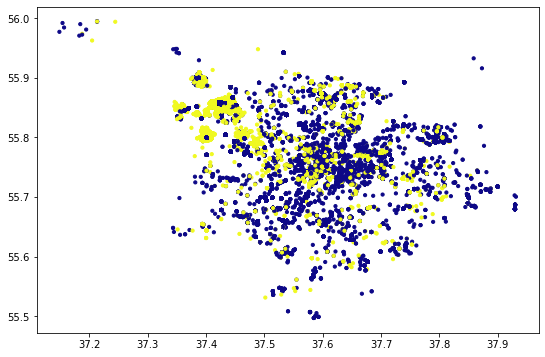

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma', s=10)

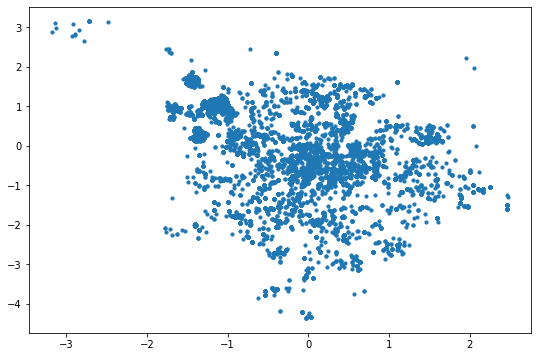

In [50]:
X_scaled = scaler.fit_transform(X)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', s=10)